Взять датасет
https://huggingface.co/datasets/merionum/ru_paraphraser
решить задачу парафраза

Решал задачу на основе этого ноутбука на  TensorFlow и  PyTorch
https://www.kaggle.com/code/dschettler8845/transformers-course-chapter-3-tf-torch

In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 33.2 MB/s 
     |████████████████████████████████| 140 kB 52.3 MB/s 
     |████████████████████████████████| 101 kB 10.7 MB/s 
     |████████████████████████████████| 212 kB 56.7 MB/s 
     |████████████████████████████████| 1.1 MB 47.1 MB/s 
     |████████████████████████████████| 596 kB 49.3 MB/s 
     |████████████████████████████████| 127 kB 12.3 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 144 kB 56.7 MB/s 
     |████████████████████████████████| 271 kB 55.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's de

In [2]:
from datasets import load_dataset, load_metric

In [3]:
corpus_train = load_dataset('merionum/ru_paraphraser', data_files='train.jsonl')

Using custom data configuration merionum--ru_paraphraser-4a63244a00d42f51


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/merionum___json/merionum--ru_paraphraser-4a63244a00d42f51/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
corpus_test = load_dataset('merionum/ru_paraphraser', data_files='test.jsonl')

Using custom data configuration merionum--ru_paraphraser-4ab1b249bc6d5bf7


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/merionum___json/merionum--ru_paraphraser-4ab1b249bc6d5bf7/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
corpus_train

DatasetDict({
    train: Dataset({
        features: ['id', 'id_1', 'id_2', 'text_1', 'text_2', 'class'],
        num_rows: 7227
    })
})

In [6]:
corpus_train['train']

Dataset({
    features: ['id', 'id_1', 'id_2', 'text_1', 'text_2', 'class'],
    num_rows: 7227
})

In [7]:
import pandas as pd
pd.options.display.max_colwidth = 300
pd.DataFrame(corpus_train['train']).sample(3)

,id,id_1,id_2,text_1,text_2,class
2904,3167,2632,6702,Правительство утвердило программу укрепления единства российской нации.,"Правительство РФ потратит 6,77 миллиарда на укрепление единства нации.",0
3958,4286,3636,7682,МВД предлагает наклеивать микрочипы на лобовое стекло автомобилей.,МВД предложило клеить радиочипы под лобовое стекло машин.,1
6874,25080,34045,34044,Жан-Мари Ле Пен выступил против избрания дочери президентом Франции,Жан-Мари Ле Пен отказался пожелать дочери победы на выборах президента Франции,0


In [8]:
# столбец  class в  PyTorch не работает
ph_train = pd.DataFrame(corpus_train['train'], columns=['text_1', 'text_2', 'class']).rename(columns={'class': 'labels'})

In [9]:
# модель принимает labels начиная с нуля
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(ph_train['labels'])
ph_train['labels']=le.transform(ph_train['labels'])

In [10]:
ph_test = pd.DataFrame(corpus_test['train'], columns=['text_1', 'text_2', 'class']).rename(columns={'class': 'labels'})

In [11]:
ph_test.head()

,text_1,text_2,labels
0,Цены на нефть восстанавливаются,Парламент Словакии поблагодарил народы бывшего СССР за Победу,-1
1,"""Гоголь-центр"" покажет видеозапись скандального спектакля ""Тангейзер""",Кехман запретил «Гоголь-центру» показывать видеозапись «Тангейзера»,-1
2,Агент: РФС вновь задерживает зарплату Фабио Капелло,СМИ: Агент Фабио Капелло грозится подать в суд на РФС,-1
3,День Победы в Москве обещает выдаться облачным,Любляна отпразднует День Победы вместе с Москвой,-1
4,Посол РФ в США: Россия будет бороться с попытками переписать историю,Правительство запланировало заработать на лотереях 400 млрд руб.,-1


In [12]:
# модель принимает labels начиная с нуля
ph_test['labels']=le.transform(ph_test['labels'])

In [13]:
ph_test.head()

,text_1,text_2,labels
0,Цены на нефть восстанавливаются,Парламент Словакии поблагодарил народы бывшего СССР за Победу,0
1,"""Гоголь-центр"" покажет видеозапись скандального спектакля ""Тангейзер""",Кехман запретил «Гоголь-центру» показывать видеозапись «Тангейзера»,0
2,Агент: РФС вновь задерживает зарплату Фабио Капелло,СМИ: Агент Фабио Капелло грозится подать в суд на РФС,0
3,День Победы в Москве обещает выдаться облачным,Любляна отпразднует День Победы вместе с Москвой,0
4,Посол РФ в США: Россия будет бороться с попытками переписать историю,Правительство запланировало заработать на лотереях 400 млрд руб.,0


In [14]:
ph_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7227 entries, 0 to 7226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text_1  7227 non-null   object
 1   text_2  7227 non-null   object
 2   labels  7227 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 169.5+ KB


In [15]:
ph_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text_1  1924 non-null   object
 1   text_2  1924 non-null   object
 2   labels  1924 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 45.2+ KB


In [16]:
from datasets import Dataset, DatasetDict

ph_data = DatasetDict({
    'train': Dataset.from_pandas(ph_train),
    'test': Dataset.from_pandas(ph_test)
})
ph_data

DatasetDict({
    train: Dataset({
        features: ['text_1', 'text_2', 'labels'],
        num_rows: 7227
    })
    test: Dataset({
        features: ['text_1', 'text_2', 'labels'],
        num_rows: 1924
    })
})

In [17]:
# Access the train subset of the dataset (Dataset Object)
raw_train_dataset = ph_data["train"]
print("\n\n\n... TRAIN DATASET\n")
print(raw_train_dataset)

# Access an example from the train subset of the dataset (Dict)
raw_train_ex = raw_train_dataset[0]
print("\n\n\n... TRAIN EXAMPLE - IDX=0\n")
for k,v in raw_train_ex.items(): print(f"\t--> {k:<10}: {v}")
    
# Access features of our Dataset Object (Dict)
raw_train_features = raw_train_dataset.features
print("\n\n\n... TRAIN DATASET FEATURES\n")
for k,v in raw_train_features.items(): print(f"\t--> {k:<10}: {v}")

# Access the indices from the train and val subsets of the dataset
print("\n\n\n... LABEL - TRAIN SUBSET - IDX=15\n")
for k,v in ph_data["train"][15].items(): 
    print(f"\t--> **{k}** : {v} ({raw_train_dataset.features['class']})") if k=="class" else print(f"\t--> {k:<10}: {v}")

print("\n\n... LABEL - VAL SUBSET - IDX=87\n")
for k,v in ph_data['test'][87].items(): 
    print(f"\t--> **{k}** : {v} ({raw_train_dataset.features['class']})") if k=="class" else print(f"\t--> {k:<10}: {v}")

# For spacing
print("\n\n")




... TRAIN DATASET

Dataset({
    features: ['text_1', 'text_2', 'labels'],
    num_rows: 7227
})



... TRAIN EXAMPLE - IDX=0

	--> text_1    : Полицейским разрешат стрелять на поражение по гражданам с травматикой.
	--> text_2    : Полиции могут разрешить стрелять по хулиганам с травматикой.
	--> labels    : 1



... TRAIN DATASET FEATURES

	--> text_1    : Value(dtype='string', id=None)
	--> text_2    : Value(dtype='string', id=None)
	--> labels    : Value(dtype='int64', id=None)



... LABEL - TRAIN SUBSET - IDX=15

	--> text_1    : Избежать "фискального обрыва": Сенат США поддержал повышение налогов.
	--> text_2    : Сенат США не допустит "фискального обрыва".
	--> labels    : 1


... LABEL - VAL SUBSET - IDX=87

	--> text_1    : СМИ: США планируют разместить конвертопланы Osprey в пригороде Токио
	--> text_2    : Пентагон решил разместить в пригороде Токио десять конвертопланов
	--> labels    : 1





In [18]:
!pip install -q --upgrade transformers[sentencepiece]

     |████████████████████████████████| 4.4 MB 5.8 MB/s 
     |████████████████████████████████| 6.6 MB 33.2 MB/s 
     |████████████████████████████████| 1.2 MB 55.0 MB/s 


In [19]:
!pip install -q --upgrade flair

     |████████████████████████████████| 401 kB 37.4 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 1.6 MB 6.6 MB/s 
     |████████████████████████████████| 981 kB 9.3 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 788 kB 33.0 MB/s 
     |████████████████████████████████| 1.2 MB 56.9 MB/s 
     |████████████████████████████████| 19.7 MB 2.8 MB/s 
     |████████████████████████████████| 199 kB 23.3 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.7 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 

In [20]:
# This prevents TF from eating all the GPU memory which will block PyTorch
import tensorflow as tf
try:
    tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [21]:
import numpy as np
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# --------------------------------------------------------------------
#                 This is OLD Stuff (previous chapter)
# --------------------------------------------------------------------
checkpoint = "cointegrated/rubert-base-cased-dp-paraphrase-detection"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, from_pt=True)
sequences = [
#    "I've been waiting for a HuggingFace course my whole life.",
#    "This course is amazing!",
     "Я ждал этот курс всю мою жизнь.",
     "Этот курс прекрасен!"
]
batch = dict(tokenizer(sequences, padding=True, truncation=True, return_tensors="tf"))
# --------------------------------------------------------------------

# --------------------------------------------------------------------
#                  This is NEW Stuff (this chapter)
# --------------------------------------------------------------------
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
labels = tf.convert_to_tensor([1, 1])
model.train_on_batch(x=batch, y=labels)

Downloading:   0%|          | 0.00/406 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.57M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/679M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined 

15.883810997009277

# PYTORCH CODE

In [22]:
import torch
import numpy as np
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification

# --------------------------------------------------------------------
#                 This is OLD Stuff (previous chapter)
# --------------------------------------------------------------------
checkpoint = "cointegrated/rubert-base-cased-dp-paraphrase-detection"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = [
     "Я ждал этот курс всю мою жизнь.",
     "Этот курс прекрасен!"
]
batch = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
# --------------------------------------------------------------------

# --------------------------------------------------------------------
#                  This is NEW Stuff (this chapter)
# --------------------------------------------------------------------
batch["labels"] = torch.tensor([1, 1])
optimizer = AdamW(model.parameters())
loss = model(**batch).loss
loss.backward()
optimizer.step()

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


BUT WE ONLY HAVE TWO SENTENCES...

Of course, just training the model on two sentences is not going to yield very good results. To get better results, you will need to prepare a bigger dataset.

In this section we will use as an example the MRPC (Microsoft Research Paraphrase Corpus) dataset, introduced in a paper by William B. Dolan and Chris Brockett. The dataset consists of 5,801 pairs of sentences, with a label indicating if they are paraphrases or not (i.e., if both sentences mean the same thing). We’ve selected it for this chapter because it’s a small dataset, so it’s easy to experiment with training on it.

LOADING A DATASET FROM THE HUB

[TENSORFLOW] VIDEO LINK - DATASETS OVERVIEW - HUGGING FACE CHANNEL [PYTORCH] VIDEO LINK - DATASETS OVERVIEW - HUGGING FACE CHANNEL The Hub doesn’t just contain models; it also has multiple datasets in lots of different languages. You can browse the datasets here, and we recommend you try to load and process a new dataset once you have gone through this section (see the general documentation here). But for now, let’s focus on the Microsoft Research Paraphrase Corpus (MRPC) Dataset! This is one of the 10 datasets composing the GLUE Benchmark, which is an academic benchmark that is used to measure the performance of ML models across 10 different text classification tasks.

The 🤗 Datasets library provides a very simple command to download and cache a dataset on the Hub. We can easily download the MRPC dataset and we will get a DatasetDict object which contains the training set, the validation set, and the test set. Each of those contains several columns (sentence1, sentence2, label, and idx) and a variable number of rows, which are the number of elements in each set (so, there are 3,668 pairs of sentences in the training set, 408 in the validation set, and 1,725 in the test set).

Note that when we download the datset, we also automatically cache the dataset, by default in ~/.cache/huggingface/dataset. Recall from Chapter 2 that you can customize your cache folder by setting the HF_HOME environment variable.

Once we have our DatasetDict, we can access each pair of sentences by simply indexing, like with a dictionary. When we index into our dataset, we will see the labels are already integers, so we won’t have to do any preprocessing there.

To know which integer corresponds to which label, we can inspect the features of our raw_train_dataset. This will tell us the type of each column. Behind the scenes, label is of type ClassLabel, and the mapping of integers to label name is stored in the names folder. 0 corresponds to not_equivalent 1 corresponds to equivalent

✏️ TRY IT OUT! Look at element 15 of the training set and element 87 of the validation set. What are their labels?

PREPROCESSING A DATASET - SENTENCE PAIRS

[TENSORFLOW] VIDEO LINK - PREPROCESSING SENTENCE PAIRS - HUGGING FACE CHANNEL [PYTORCH] VIDEO LINK - PREPROCESSING SENTENCE PAIRS - HUGGING FACE CHANNEL To preprocess the dataset, we need to convert the text to numbers the model can make sense of. As you saw in the previous chapter, this is done with a tokenizer. We can feed the tokenizer one sentence or a list of sentences, so we can directly tokenize all the first sentences and all the second sentences of each pair.

However, we can’t just pass two sequences to the model and get a prediction of whether the two sentences are paraphrases or not. We need to handle the two sequences as a pair, and apply the appropriate preprocessing. Fortunately, the tokenizer can also take a pair of sequences and prepare it the way our BERT model expects.

If we decode the IDs inside input_ids back to words, we see the model expects the inputs to be of the form [CLS] sentence1 [SEP] sentence2 [SEP] when there are two sentences.

✏️ TRY IT OUT! Take element 15 of the training set and tokenize the two sentences separately and as a pair. What’s the difference between the two results?

In [23]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_sentences_1 = tokenizer(corpus_train["train"]["text_1"])
tokenized_sentences_2 = tokenizer(corpus_train["train"]["text_2"])

print("\n\n... FIRST 3 ORIGINAL SENTENCE PAIRS ...\n")
for i in range(3): print(f"\tSENTENCE 1 --> '{corpus_train['train']['text_1'][i]}'\n\tSENTENCE 2 --> '{corpus_train['train']['text_2'][i]}'\n")

print("\n\n... FIRST 3 TOKENIZED SENTENCE PAIRS ...\n")
for i in range(3): print(f"\tSENTENCE 1 --> '{tokenized_sentences_1[i]}'\n\tSENTENCE 2 --> '{tokenized_sentences_2[i]}'\n")

e15_s1 = corpus_train['train']['text_1'][15]
e15_s2 = corpus_train['train']['text_2'][15]
    
print("\n\n\n... ELEMENT 15 - ORIGINAL SENTENCE PAIRS ...\n")
print(f"\tSENTENCE 1 --> '{e15_s1}'\n\tSENTENCE 2 --> '{e15_s2}'\n")

e15_tokenize_seperately_s1 = tokenizer.convert_ids_to_tokens(tokenizer(e15_s1)["input_ids"])
e15_tokenize_seperately_s2 = tokenizer.convert_ids_to_tokens(tokenizer(e15_s2)["input_ids"])
e15_tokenized_together = tokenizer(e15_s1, e15_s2)
e15_tokens = tokenizer.convert_ids_to_tokens(e15_tokenized_together["input_ids"])

print("\n\n\n... ELEMENT 15 - TOKENIZED SEPERATELY ...\n")
print(f"\tSENTENCE 1 --> {' '.join(e15_tokenize_seperately_s1)}\n\tSENTENCE 2 --> {' '.join(e15_tokenize_seperately_s2)}\n")
    
print("\n\n\n... ELEMENT 15 - TOKENIZED TOGETHER ...\n")
print(f"\tSENTENCES --> {' '.join(e15_tokens)}\n")



... FIRST 3 ORIGINAL SENTENCE PAIRS ...

	SENTENCE 1 --> 'Полицейским разрешат стрелять на поражение по гражданам с травматикой.'
	SENTENCE 2 --> 'Полиции могут разрешить стрелять по хулиганам с травматикой.'

	SENTENCE 1 --> 'Право полицейских на проникновение в жилище решили ограничить.'
	SENTENCE 2 --> 'Правила внесудебного проникновения полицейских в жилище уточнят.'

	SENTENCE 1 --> 'Президент Египта ввел чрезвычайное положение в мятежных городах.'
	SENTENCE 2 --> 'Власти Египта угрожают ввести в стране чрезвычайное положение.'



... FIRST 3 TOKENIZED SENTENCE PAIRS ...

	SENTENCE 1 --> 'Encoding(num_tokens=15, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])'
	SENTENCE 2 --> 'Encoding(num_tokens=13, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])'

	SENTENCE 1 --> 'Encoding(num_tokens=11, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])'
	S

PREPROCESSING A DATASET - TOKEN TYPE IDS

We discussed the input_ids and attention_mask keys in Chapter 2, but we put off talking about token_type_ids. In the following example, this is what will tell the model which part of the input is the first sentence and which is the second sentence.

In the previous code example, we saw that when we tokenized the sentences together, we received a slightly different output result. In the next code cell we will take the previous code example and align the token_type_ids with the decoded words.

[CLS] sentence1 [SEP] sentence2 [SEP]

As you can see, the parts of the input corresponding to [CLS] sentence1 [SEP] all have a token type ID of 0, while the other parts, corresponding to sentence2 [SEP], all have a token type ID of 1.

Note that if you select a different checkpoint, you won’t necessarily have the token_type_ids in your tokenized inputs (for instance, they’re not returned if you use a DistilBERT model). They are only returned when the model will know what to do with them, because it has seen them during its pretraining.

Here, BERT is pretrained with token type IDs, and on top of the masked language modeling objective we talked about in Chapter 1, it has an additional objective called next sentence prediction. The goal with this task is to model the relationship between pairs of sentences.

With next sentence prediction, the model is provided pairs of sentences (with randomly masked tokens) and asked to predict whether the second sentence follows the first. To make the task non-trivial, half of the time the sentences follow each other in the original document they were extracted from, and the other half of the time the two sentences come from two different documents.

In general, you don’t need to worry about whether or not there are token_type_ids in your tokenized inputs: as long as you use the same checkpoint for the tokenizer and the model, everything will be fine as the tokenizer knows what to provide to its model.

In [24]:
print("\nFIRST TEN TOKENS   :", [f"{x:<5}" for x in e15_tokenized_together["input_ids"][:10]])
print("FIRST TEN STRINGS  :", [f"{x:<4}" for x in e15_tokens[:10]])
print("FIRST TEN TYPE IDS :", [f"{x:<5}" for x in e15_tokenized_together["token_type_ids"][:10]])
print("\nTEN TO TWENTY TOKENS   :", [f"{x:<5}" for x in e15_tokenized_together["input_ids"][10:20]])
print("TEN TO TWENTY STRINGS  :", [f"{x:<4}" for x in e15_tokens[10:20]])
print("TEN TO TWENTY TYPE IDS :", [f"{x:<5}" for x in e15_tokenized_together["token_type_ids"][10:20]])
print("\nTWENTY TO THIRTY TOKENS   :", [f"{x:<5}" for x in e15_tokenized_together["input_ids"][20:30]])
print("TWENTY TO THIRTY STRINGS  :", [f"{x:<4}" for x in e15_tokens[20:30]])
print("TWENTY TO THIRTY TYPE IDS :", [f"{x:<5}" for x in e15_tokenized_together["token_type_ids"][20:30]])
print("\nLAST 14 TOKENS   :", [f"{x:<5}" for x in e15_tokenized_together["input_ids"][30:]])
print("LAST 14 STRINGS  :", [f"{x:<4}" for x in e15_tokens[30:]])
print("LAST 14 TYPE IDS :", [f"{x:<5}" for x in e15_tokenized_together["token_type_ids"][30:]], "\n\n")


for i, (_id, _tt_id) in enumerate(zip(e15_tokenized_together["input_ids"], e15_tokenized_together["token_type_ids"])):
    print(f"\nTOKEN AT POSITION  ** {i} **")
    print(f"\tTOKEN AS STRING --> {e15_tokens[i]}")
    print(f"\tTOKEN RAW VALUE --> {_id}")
    print(f"\tTOKEN TYPE ID   --> {_tt_id}")


FIRST TEN TOKENS   : ['101  ', '66305', '33041', '4099 ', '108  ', '66017', '4688 ', '82487', '108  ', '156  ']
FIRST TEN STRINGS  : ['[CLS]', 'Изб ', '##ежа', '##ть', '"   ', 'фиск', '##ального', 'обрыва', '"   ', ':   ']
FIRST TEN TYPE IDS : ['0    ', '0    ', '0    ', '0    ', '0    ', '0    ', '0    ', '0    ', '0    ', '0    ']

TEN TO TWENTY TOKENS   : ['34549', '4425 ', '25113', '23617', '22123', '132  ', '102  ', '34549', '4425 ', '1699 ']
TEN TO TWENTY STRINGS  : ['Сенат', 'США ', 'поддержал', 'повышение', 'налогов', '.   ', '[SEP]', 'Сенат', 'США ', 'не  ']
TEN TO TWENTY TYPE IDS : ['0    ', '0    ', '0    ', '0    ', '0    ', '0    ', '0    ', '1    ', '1    ', '1    ']

TWENTY TO THIRTY TOKENS   : ['113138', '108  ', '66017', '4688 ', '82487', '108  ', '132  ', '102  ']
TWENTY TO THIRTY STRINGS  : ['допустит', '"   ', 'фиск', '##ального', 'обрыва', '"   ', '.   ', '[SEP]']
TWENTY TO THIRTY TYPE IDS : ['1    ', '1    ', '1    ', '1    ', '1    ', '1    ', '1    ', '1    ']


PREPROCESSING A DATASET - TOKNEIZE AN ENTIRE DATASET

Now that we have seen how our tokenizer can deal with one pair of sentences, we can use it to tokenize our whole dataset: like in the previous chapter, we can feed the tokenizer a list of pairs of sentences by giving it the list of first sentences, then the list of second sentences. This is also compatible with the padding and truncation options we saw in Chapter 2.

This works well, but it has the disadvantage of returning a dictionary (with our keys: input_ids, attention_mask, and token_type_ids, and values that are lists of lists). It will also only work if you have enough RAM to store your whole dataset during the tokenization (whereas the datasets from the 🤗 Datasets library are Apache Arrow files stored on the disk, so you only keep the samples you ask for loaded in memory).

To keep the data as a dataset, we will use the Dataset.map() method. This also allows us some extra flexibility, if we need more preprocessing done than just tokenization. The map() method works by applying a function on each element of the dataset.

The way the 🤗 Datasets library applies this processing is by adding new fields to the datasets, one for each key in the dictionary returned by the preprocessing function.

You can even use multiprocessing when applying your preprocessing function with map() by passing along a num_proc argument. We didn’t do this here because the 🤗 Tokenizers library already uses multiple threads to tokenize our samples faster, but if you are not using a fast tokenizer backed by this library, this could speed up your preprocessing.

Take for example the code in the next cell, the tokenize_function returns a dictionary with the keys: input_ids, attention_mask, and token_type_ids, so those three fields are added to all splits of our dataset. Note that we could also have changed existing fields if our preprocessing function returned a new value for an existing key in the dataset to which we applied map().

The last thing we will need to do is pad all the examples to the length of the longest element when we batch elements together — a technique we refer to as dynamic padding... we will discuss this in the next section.

In [25]:
def tokenize_function(example):
    """
    This function takes a dictionary (like the items of our dataset) and returns a new dictionary 
    with the keys input_ids, attention_mask, and token_type_ids. 
        - Note that it also works if the example dictionary contains several samples 
          (each key as a list of sentences) since the tokenizer works on lists 
          of pairs of sentences, as seen before. 
    
    This will allow us to use the option batched=True in our call to map(), 
    which will greatly speed up the tokenization. 
        - The tokenizer is backed by a tokenizer written in Rust from the 
          🤗 Tokenizers library. 
        - This tokenizer can be very fast, but only if we give it lots of 
          inputs at once.
    
    Note that we’ve left the padding argument out in our tokenization function for now. 
        - This is because padding all the samples to the maximum length is not efficient
        - It’s better to pad the samples when we’re building a batch, as then we only need to 
          pad to the maximum length in that batch, and not the maximum length in the entire dataset. 
        - This can save a lot of time and processing power when the inputs have variable lengths.
    
    Args:
        example (Dict): A dictionary containing the items of the dataset.
    
    Returns:
        A new dictionary with the keys input_ids, attention_mask, and token_type_ids.
    
    """
    return tokenizer(example["text_1"], example["text_2"], truncation=True) #, padding=True)

# Here is how we apply the tokenization function on all our datasets at once. 
# 
# We’re using batched=True in our call to map so the function is applied to 
# multiple elements of our dataset at once, and not on each element separately. 
tokenized_datasets = ph_data.map(tokenize_function, batched=True)
tokenized_datasets

Parameter 'function'=<function tokenize_function at 0x7f4c986e2830> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/8 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


  0%|          | 0/2 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text_1', 'text_2', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 7227
    })
    test: Dataset({
        features: ['text_1', 'text_2', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1924
    })
})

PREPROCESSING A DATASET - COLLATING AND DYNAMIC PADDING

VIDEO LINK - DYNAMIC PADDING - HUGGING FACE CHANNEL The function that is responsible for putting together samples inside a batch is called a collate function. The default collator is a function that will just convert your samples to tf.Tensor and concatenate them (recursively if your elements are lists, tuples, or dictionaries). This won’t be possible in our case since the inputs we have won’t all be of the same size. We have deliberately postponed the padding, to only apply it as necessary on each batch and avoid having over-long inputs with a lot of padding. This will speed up training by quite a bit, but note that if you’re training on a TPU it can cause problems — TPUs prefer fixed shapes, even when that requires extra padding.

To do this in practice, we have to define a collate function that will apply the correct amount of padding to the items of the dataset we want to batch together. Fortunately, the 🤗 Transformers library provides us with such a function via DataCollatorWithPadding. It takes a tokenizer when you instantiate it (to know which padding token to use, and whether the model expects padding to be on the left or on the right of the inputs) and will do everything you need.

To test this new function, we will need to grab a few samples from our training set that we would like to batch together. Before collating them, we will remove the columns idx, sentence1, and sentence2 as they won’t be needed and contain strings (and we can’t create tensors with strings)

No spoilers... but we will get samples of varying length, from 32 to 67. Dynamic padding means the samples in this batch should all be padded to a length of 67, the maximum length inside the batch. Without dynamic padding, all of our samples would have to be padded to the maximum length in the whole dataset, or the maximum length the model can accept.

#TENSORFLOW CODE

In [26]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")
samples = tokenized_datasets['train'][:8]
samples = {k: v for k, v in samples.items() if k not in ['id', 'id_1', 'id_2', 'text_1', 'text_2']}

print("\n\n\n... LENGTH OF SAMPLES IN BATCH")
print("\t", [len(x) for x in samples["input_ids"]])

batch = data_collator(samples)
print("\n\n... SHAPE OF TENSORFLOW ARRAYS IN BATCH AFTER COLLATING")
for k,v in batch.items(): print(f"\t{k:<15} ----> {v.shape}")




... LENGTH OF SAMPLES IN BATCH
	 [27, 22, 21, 24, 25, 26, 28, 21]


... SHAPE OF TENSORFLOW ARRAYS IN BATCH AFTER COLLATING
	labels          ----> (8,)
	input_ids       ----> (8, 28)
	token_type_ids  ----> (8, 28)
	attention_mask  ----> (8, 28)


In [27]:
batch

{'labels': <tf.Tensor: shape=(8,), dtype=int32, numpy=array([1, 1, 1, 0, 1, 2, 0, 1], dtype=int32)>, 'input_ids': <tf.Tensor: shape=(8, 28), dtype=int32, numpy=
array([[   101,  34784,   4385,  10634,   1504,  40499,   1469,  16661,
          1516,  30435,    869,  41344,  11819,    132,    102,  94695,
          7603,  36888,  40499,   1516,  31869,   1565,    869,  41344,
         11819,    132,    102,      0],
       [   101,  45004,  21421,   1469,  68827,    845,  63445,  17062,
         40998,    132,    102,  52158,  90088,   1766,  52026,  21421,
           845,  63445,  15942,    868,    132,    102,      0,      0,
             0,      0,      0,      0],
       [   101,  13890,  21697,  42609,  61230,  14832,    845, 118004,
         15825,    132,    102,  21360,  21697,  69682,  24247,    845,
         10758,  61230,  14832,    132,    102,      0,      0,      0,
             0,      0,      0,      0],
       [   101,  24795,   7529,  20741,   1703,  15882,  15565, 1027

# PYTORCH CODE

In [28]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")
samples = tokenized_datasets["train"][:8]
samples = {k: v for k, v in samples.items() if k not in ['id', 'id_1', 'id_2', 'text_1', 'text_2']}

print("\n\n\n... LENGTH OF SAMPLES IN BATCH")
print("\t", [len(x) for x in samples["input_ids"]])

batch = data_collator(samples)
print("\n\n... SHAPE OF PYTORCH ARRAYS IN BATCH AFTER COLLATING")
for k,v in batch.items(): print(f"\t{k:<15} ----> {v.shape}")




... LENGTH OF SAMPLES IN BATCH
	 [27, 22, 21, 24, 25, 26, 28, 21]


... SHAPE OF PYTORCH ARRAYS IN BATCH AFTER COLLATING
	labels          ----> torch.Size([8])
	input_ids       ----> torch.Size([8, 28])
	token_type_ids  ----> torch.Size([8, 28])
	attention_mask  ----> torch.Size([8, 28])


In [29]:
batch

{'labels': tensor([1, 1, 1, 0, 1, 2, 0, 1]), 'input_ids': tensor([[   101,  34784,   4385,  10634,   1504,  40499,   1469,  16661,   1516,
          30435,    869,  41344,  11819,    132,    102,  94695,   7603,  36888,
          40499,   1516,  31869,   1565,    869,  41344,  11819,    132,    102,
              0],
        [   101,  45004,  21421,   1469,  68827,    845,  63445,  17062,  40998,
            132,    102,  52158,  90088,   1766,  52026,  21421,    845,  63445,
          15942,    868,    132,    102,      0,      0,      0,      0,      0,
              0],
        [   101,  13890,  21697,  42609,  61230,  14832,    845, 118004,  15825,
            132,    102,  21360,  21697,  69682,  24247,    845,  10758,  61230,
          14832,    132,    102,      0,      0,      0,      0,      0,      0,
              0],
        [   101,  24795,   7529,  20741,   1703,  15882,  15565, 102778,   7079,
         103076,   1469,  26815,    132,    102,  77594,  18935,  28777,   205

# 3.2 FINE-TUNING A MODEL     TENSORFLOW & KERAS  VERSION    ⤒
Once you’ve done all the data preprocessing work in the last section, you have just a few steps left to train the model. Note, however, that the model.fit() command will run very slowly on a CPU. If you don’t have a GPU set up, you can get access to free GPUs or TPUs on Kaggle or on Google Colab.

The code examples below assume you have already executed the examples in the previous section. The code below will use a try/except to validate the datasets have been created. The except branch of this code provides an excellent recap of the required steps from the previous section.

In [40]:
# Step 4: Instantiate the data collator from the tokenizer to return TF tensors
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

# Step 5A: Create the training dataset
tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)
    
# Step 5B: Create the validation dataset
tf_validation_dataset = tokenized_datasets["test"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8,
)
    
# See what we have...
print(f"\n\n\n... TRAINING DATASET ...\n\n{tf_train_dataset}")
print(f"\n\n\n... VALIDATION DATASET ...\n\n{tf_validation_dataset}")




... TRAINING DATASET ...

<PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>



... VALIDATION DATASET ...

<PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [41]:
i=0
for element in tf_train_dataset.as_numpy_iterator():
  if i ==0: 
      print(element[1])
      print(element[0]['input_ids'])
      print(element[0]['attention_mask'])
      print(element[0]['token_type_ids'])
      i+=1 

[2 1 1 0 1 0 1 0]
[[   101    781  97094  14540  26692  14368   6678  13796    132    102
   25309  26692  38938   6678  13796  97094    132    102      0      0
       0      0      0      0      0      0      0      0]
 [   101    781  30585  38447  18748    612 103361  53254    132    102
   21030  78080    845  30585   5848  32286    612  29605  82782  47107
     132    102      0      0      0      0      0      0]
 [   101  40555   5732    880  87759   2343  25082  18097  41716    852
   29472  21203    845  15262    132    102  58524  21203    845  15262
   87759   2343  22133  12747    132    102      0      0]
 [   101   7546  38250   1828    612  11007  31399    876    128   5318
   33176  10807   3454    869  64476    132    102  31399  53333    869
   64476    612  49177  10671  21409  14045    132    102]
 [   101  88912  80926    156  12382  17006  23222 111712   2785   3955
     865    132    102    781  98194    842    130   1469    130  52362
  118051  10950  52021  49

# BASIC TRAINING

TensorFlow models imported from 🤗 Transformers are already Keras models. Here is a short introduction to Keras.

[TENSORFLOW]    VIDEO LINK - KERAS INTRODUCTION - HUGGING FACE CHANNEL
That means that once we have our data, very little work is required to begin training on it.

[TENSORFLOW]    VIDEO LINK - FINE-TUNING WITH KERAS - HUGGING FACE CHANNEL
As in the previous chapter, we will use the TFAutoModelForSequenceClassification class, with two labels. You will notice that unlike in Chapter 2, you get a warning after instantiating this pretrained model. This is because BERT has not been pretrained on classifying pairs of sentences, so the head of the pretrained model has been discarded and a new head suitable for sequence classification has been inserted instead. The warnings indicate that some weights were not used (the ones corresponding to the dropped pretraining head) and that some others were randomly initialized (the ones for the new head). It concludes by encouraging you to train the model, which is exactly what we are going to do now.

To fine-tune the model on our dataset, we just have to compile() our model and then pass our data to the fit() method. This will start the fine-tuning process (which should take a couple of minutes on a GPU) and report training loss as it goes, plus the validation loss at the end of each epoch.

In [42]:
# Import the model class and plotting library
from transformers import TFAutoModelForSequenceClassification
import matplotlib.pyplot as plt

checkpoint = "cointegrated/rubert-base-cased-dp-paraphrase-detection"
# Instantiate the model from previously defined checkpoint - see warning
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, from_pt=True) #, num_labels = 3) - в модели классификатор на 2 лэйбла



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [43]:
model.summary()

Model: "tf_bert_for_sequence_classification_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  177853440 
                                                                 
 dropout_113 (Dropout)       multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 177,854,978
Trainable params: 177,854,978
Non-trainable params: 0
_________________________________________________________________


In [44]:
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs):
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs

  def build(self, input_shape):
    self.kernel = self.add_weight("kernel",
                                  shape=[int(input_shape[-1]),
                                         self.num_outputs])

  def call(self, inputs):
    return tf.matmul(inputs, self.kernel)

layer = MyDenseLayer(3)


In [45]:
model.classifier = layer

In [37]:
#не работает
 #model.classifier = tf.keras.layers.Linear(in_features=768, out_features=3, bias=True)

Epoch 1/5
904/904 [==============================] - 144s 138ms/step - loss: 1.2297 - accuracy: 0.3676 - val_loss: 1.2092 - val_accuracy: 0.1944
Epoch 2/5
904/904 [==============================] - 123s 136ms/step - loss: 1.1937 - accuracy: 0.3595 - val_loss: 1.1132 - val_accuracy: 0.4044
Epoch 3/5
904/904 [==============================] - 123s 136ms/step - loss: 1.1825 - accuracy: 0.3710 - val_loss: 1.0820 - val_accuracy: 0.4044
Epoch 4/5
904/904 [==============================] - 122s 135ms/step - loss: 1.1822 - accuracy: 0.3712 - val_loss: 1.0688 - val_accuracy: 0.4012
Epoch 5/5
904/904 [==============================] - 123s 136ms/step - loss: 1.1629 - accuracy: 0.3645 - val_loss: 1.1052 - val_accuracy: 0.4012


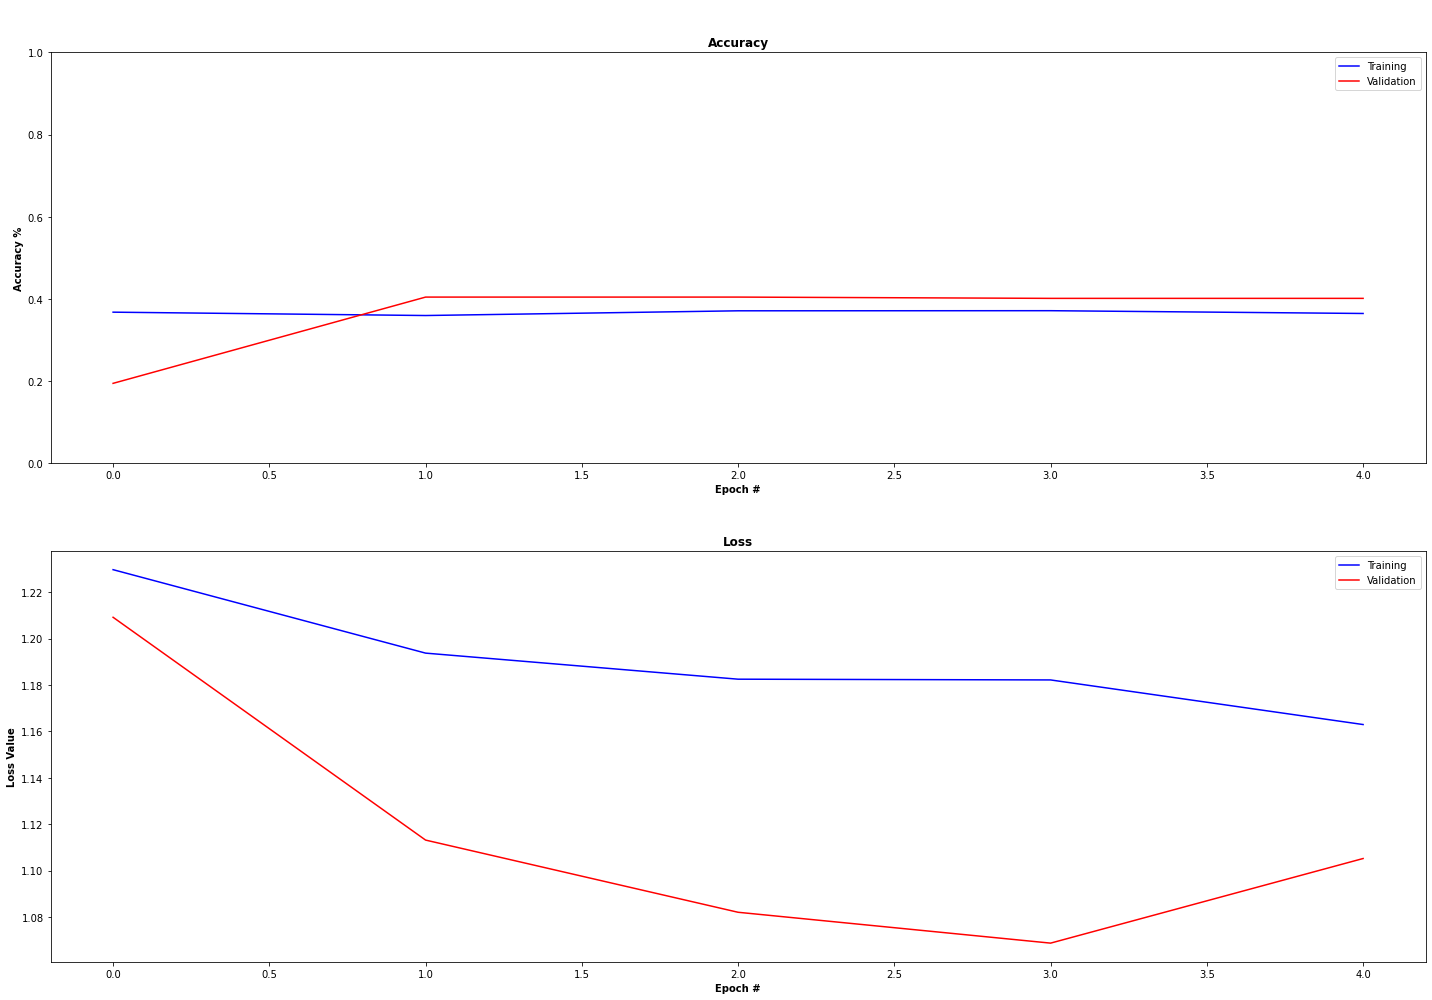

In [46]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# Define the number of epochs and report the batch size
num_epochs = 5
batch_size = 8

# Train the model
history = model.fit(
    tf_train_dataset,
    validation_data=tf_validation_dataset,
    epochs=num_epochs,
)

plt.figure(figsize=(20, 14))
plt.subplot(2, 1, 1)
plt.title("\n\nAccuracy", fontweight="bold")
l_1 = plt.plot(history.history["accuracy"], "-b", label="Training")
l_2 = plt.plot(history.history["val_accuracy"], "-r", label="Validation")
plt.ylim(0, 1.0)
plt.xlabel("Epoch #", fontweight="bold")
plt.ylabel("Accuracy %", fontweight="bold")
plt.legend()
plt.subplot(2, 1, 2)
plt.title("\n\nLoss", fontweight="bold")
plt.plot(history.history["loss"], "-b", label="Training")
plt.plot(history.history["val_loss"], "-r", label="Validation")
plt.xlabel("Epoch #", fontweight="bold")
plt.ylabel("Loss Value", fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

IMPROVING TRAINING PERFORMANCE

[TENSORFLOW]    VIDEO LINK - LEARNING RATE SCHEDULING WITH TENSORFLOW - HUGGING FACE CHANNEL
If you try the above code, it certainly runs, but you’ll find that the loss declines only slowly or sporadically. The primary cause is the learning rate. As with the loss, when we pass Keras the name of an optimizer as a string, Keras initializes that optimizer with default values for all parameters, including learning rate (or, in the case above, we instantiated it from the correct class but did not overwrite the default learning rate value). This is usually ok, however, we know that transformer models benefit from a much lower learning rate than the default for Adam.

Adam's default starting learning rate is 1e-3, also written as 10 to the power of -3, or 0.001.
Transformers often start their learning rates around 5e-5 (0.00005), which is some twenty times lower than the default!
In addition to lowering the learning rate, we have a second trick up our sleeve: We can slowly reduce the learning rate over the course of training. In the literature, you will sometimes see this referred to as decaying or annealing the learning rate. In Keras, the best way to do this is to use a learning rate scheduler. A good one to use is PolynomialDecay — despite the name, with default settings it simply linearly decays the learning rate from the initial value to the final value over the course of training, which is exactly what we want. In order to use a scheduler correctly, though, we need to tell it how long training is going to be (num_train_steps)

Once we have our all-new optimizer, we can try training with it similar to before. We will first need to reload the model, to reset the changes to the weights from the training run we just did, and then we can compile it with the new optimizer and fit it on our datasets.


The 🤗 Transformers library also has a create_optimizer() function that will create an AdamW Optimizer with learning rate decay. This is a convenient shortcut that you’ll see in detail in future sections of the course.


💡    If you want to automatically upload your model to the Hub during training, you can pass along a PushToHubCallback in the model.fit() method. We will learn more about this in Chapter 4

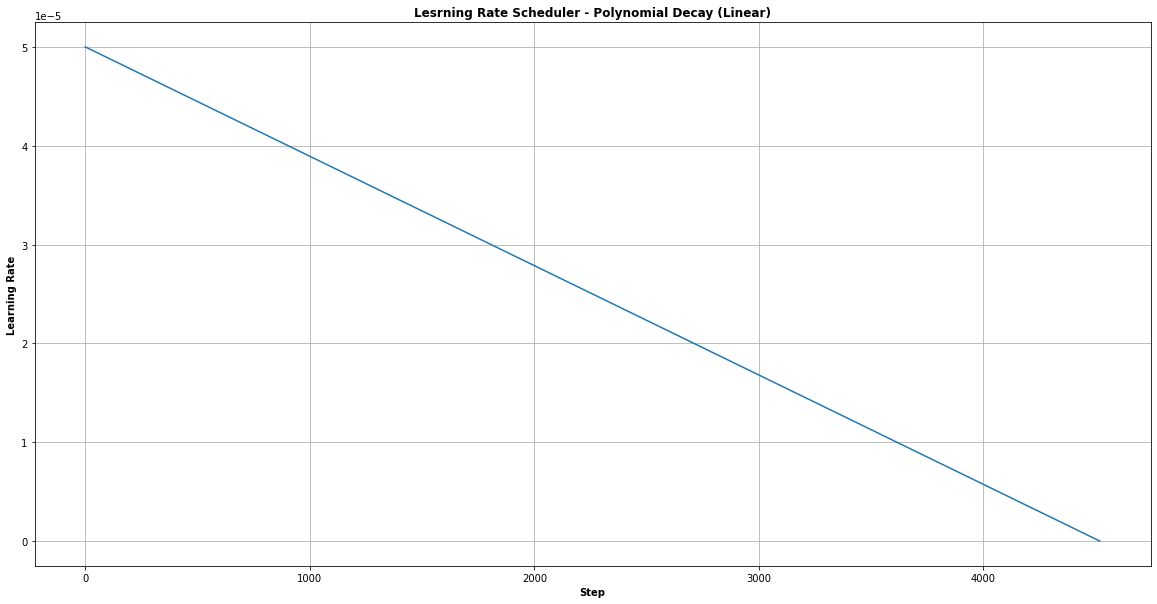

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Epoch 1/5
904/904 [==============================] - 142s 140ms/step - loss: 0.7070 - accuracy: 0.6573 - val_loss: 0.7244 - val_accuracy: 0.6674
Epoch 2/5
904/904 [==============================] - 123s 136ms/step - loss: 0.4702 - accuracy: 0.8039 - val_loss: 0.7435 - val_accuracy: 0.7017
Epoch 3/5
904/904 [==============================] - 123s 137ms/step - loss: 0.2466 - accuracy: 0.9085 - val_loss: 0.9553 - val_accuracy: 0.6658
Epoch 4/5
904/904 [==============================] - 123s 136ms/step - loss: 0.1050 - accuracy: 0.9650 - val_loss: 1.2826 - val_accuracy: 0.6752
Epoch 5/5
904/904 [==============================] - 124s 137ms/step - loss: 0.0427 - accuracy: 0.9863 - val_loss: 1.4393 - val_accuracy: 0.6856


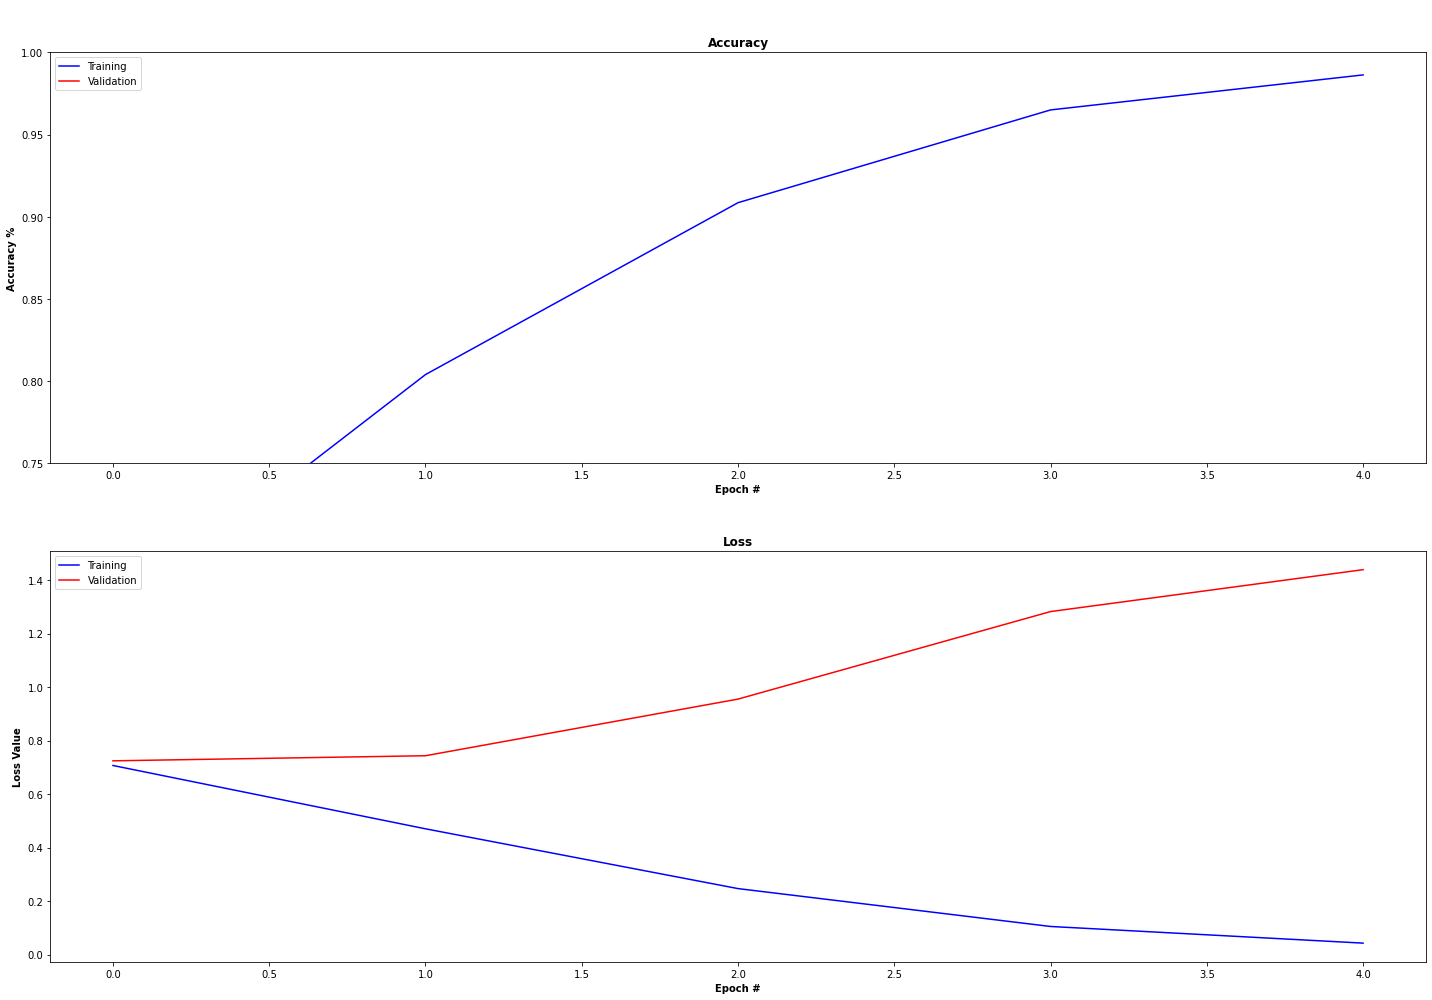

In [47]:
# The number of training steps is the number of samples in the dataset, 
# divided by the batch size then multiplied by the total number of epochs
#     - Because the dataset is already batched we don't need to divide 
num_train_steps = len(tf_train_dataset) * num_epochs
lr_scheduler = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=5e-5, 
    end_learning_rate=0.0,
    decay_steps=num_train_steps
)
opt = tf.keras.optimizers.Adam(learning_rate=lr_scheduler)

# Plot the learning rate
plt.figure(figsize=(20,10))
plt.plot(np.arange(num_train_steps), [lr_scheduler(i) for i in range(num_train_steps)])
plt.grid(True)
plt.title("Lesrning Rate Scheduler - Polynomial Decay (Linear)", fontweight="bold")
plt.xlabel("Step", fontweight="bold")
plt.ylabel("Learning Rate", fontweight="bold")
plt.show()

# Redeclare the model, compile and fit
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, from_pt=True)
model.classifier = layer


loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])
history = model.fit(tf_train_dataset, validation_data=tf_validation_dataset, epochs=num_epochs)

plt.figure(figsize=(20, 14))
plt.subplot(2, 1, 1)
plt.title("\n\nAccuracy", fontweight="bold")
l_1 = plt.plot(history.history["accuracy"], "-b", label="Training")
l_2 = plt.plot(history.history["val_accuracy"], "-r", label="Validation")
plt.ylim(0.75, 1.0)
plt.xlabel("Epoch #", fontweight="bold")
plt.ylabel("Accuracy %", fontweight="bold")
plt.legend()
plt.subplot(2, 1, 2)
plt.title("\n\nLoss", fontweight="bold")
plt.plot(history.history["loss"], "-b", label="Training")
plt.plot(history.history["val_loss"], "-r", label="Validation")
plt.xlabel("Epoch #", fontweight="bold")
plt.ylabel("Loss Value", fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

MODEL PREDICTIONS

[TENSORFLOW]    VIDEO LINK - PREDICTIONS AND METRICS - HUGGING FACE CHANNEL
Training and watching the loss go down is all very nice, but what if we want to actually get outputs from the trained model, either to compute some metrics, or to use the model in production? To do that, we can just use the predict() method. This will return the logits from the output head of the model, one per class. We can convert these logits into the model’s class predictions by using argmax to find the highest logit, which corresponds to the most likely class.

Now, we can use those predictions to compute some metrics! We can load the metrics associated with the MRPC dataset as easily as we loaded the dataset, this time with the load_metric() function. The object returned has a compute() method we can use to do the metric calculation.

The exact results you get may vary, as the random initialization of the model head might change the metrics it achieved. Here, we can see our model has an accuracy of 85 to 86% on the validation set and an F1 score of 89 to 90. Those are the two metrics used to evaluate results on the MRPC dataset for the GLUE benchmark. The table in the BERT paper reported an F1 score of 88.9 for the base model. That was the uncased model while we are currently using the cased model, which explains the better result.

This concludes the introduction to fine-tuning using the Keras API. An example of doing this for most common NLP tasks will be given in Chapter 7. If you would like to hone your skills on the Keras API, try to fine-tune a model on the GLUE SST-2 dataset, using the data processing you did in Section 3.1

In [58]:
from sklearn.metrics import f1_score, accuracy_score

In [79]:
def simple_accuracy(predictions, labels):
    return (predictions == labels).mean() #.item()

In [63]:
from datasets import load_metric
import gc # garbage collector

preds = model.predict(tf_validation_dataset)["logits"]
class_preds = tf.argmax(preds, axis=1)

print(f"Raw Prediction Shape   : {preds.shape}")
print(f"Class Prediction Shape : {class_preds.shape}")

Raw Prediction Shape   : (1924, 3)
Class Prediction Shape : (1924,)


In [77]:
len(list(class_preds.numpy()))

1924

In [68]:
len(ph_data['test']['labels'])

1924

In [83]:
print(f"Validation Metrics:\n\t--> {simple_accuracy(predictions=class_preds.numpy(), labels=np.array(ph_data['test']['labels']))}")


# CLEANUP
tf.keras.backend.clear_session(); gc.collect(); gc.collect();

Validation Metrics:
	--> 0.6855509355509356


# 3.3 FINE-TUNING A MODEL     PYTORCH TRAINER API  VERSION    ⤒
[PYTORCH]              VIDEO LINK - THE TRAINER API - HUGGING FACE CHANNEL
🤗 Transformers provides a Trainer class to help you fine-tune any of the pretrained models it provides on your dataset. Once you’ve done all the data preprocessing work in the last section, you have just a few steps left to define the Trainer. The hardest part is likely to be preparing the environment to run Trainer.train(), as it will run very slowly on a CPU. If you don’t have a GPU set up, you can get access to free GPUs or TPUs on Kaggle and Google Colab.

The code examples below assume you have already executed the examples in the previous section. The code below will use a try/except to validate the datasets have been created. The except branch of this code provides an excellent recap of the required steps from the previous section.

In [84]:
try:
    if data_collator.return_tensors=="pt":
        print(f"\n\n\n... DATA COLLATOR ...\n\n{data_collator}")
        print(f"\n\n\n... TOKENIZED DATASETS ...\n\n{tokenized_datasets}")
    else:
        raise ValueError()
except:    
    # Step 1: Imports
    from datasets import load_dataset
    from transformers import AutoTokenizer, DataCollatorWithPadding
    import numpy as np

    # Step 2: Initialize --> Dataset, Tokenizer (from ckpt)
    tokenizer = AutoTokenizer.from_pretrained(checkpoint)

    # Step 3: Tokenize the entire datasets and batch
    #             -  Note:  The tokenize Function was defined above and 
    #                       is not copied here for brevity
    #  Повторно чтобы не искать
    tokenized_datasets = ph_data.map(tokenize_function, batched=True)


    # Step 4: Instantiate the data collator from the tokenizer to return TF tensors
    data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")
    
    # See what we have...
    print(f"\n\n\n... DATA COLLATOR ...\n\n{data_collator}")
    print(f"\n\n\n... TOKENIZED DATASETS ...\n\n{tokenized_datasets}")

  0%|          | 0/8 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


  0%|          | 0/2 [00:00<?, ?ba/s]




... DATA COLLATOR ...

DataCollatorWithPadding(tokenizer=PreTrainedTokenizerFast(name_or_path='cointegrated/rubert-base-cased-dp-paraphrase-detection', vocab_size=119547, model_max_len=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}), padding=True, max_length=None, pad_to_multiple_of=None, return_tensors='pt')



... TOKENIZED DATASETS ...

DatasetDict({
    train: Dataset({
        features: ['text_1', 'text_2', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 7227
    })
    test: Dataset({
        features: ['text_1', 'text_2', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1924
    })
})


In [85]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text_1', 'text_2', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 7227
    })
    test: Dataset({
        features: ['text_1', 'text_2', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1924
    })
})

In [86]:
# Step 4: Instantiate the data collator from the tokenizer to return TF tensors
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")
    
# See what we have...
print(f"\n\n\n... DATA COLLATOR ...\n\n{data_collator}")
print(f"\n\n\n... TOKENIZED DATASETS ...\n\n{tokenized_datasets}")




... DATA COLLATOR ...

DataCollatorWithPadding(tokenizer=PreTrainedTokenizerFast(name_or_path='cointegrated/rubert-base-cased-dp-paraphrase-detection', vocab_size=119547, model_max_len=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}), padding=True, max_length=None, pad_to_multiple_of=None, return_tensors='pt')



... TOKENIZED DATASETS ...

DatasetDict({
    train: Dataset({
        features: ['text_1', 'text_2', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 7227
    })
    test: Dataset({
        features: ['text_1', 'text_2', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1924
    })
})


BASIC TRAINING

The first step before we can define our Trainer is to define a TrainingArguments class that will contain all the hyperparameters the Trainer will use for training and evaluation. The only argument you have to provide is a directory where the trained model will be saved, as well as the checkpoints along the way. For all the rest, you can leave the defaults, which should work pretty well for a basic fine-tuning.

The second step is to define our model. As in the previous chapter, we will use the AutoModelForSequenceClassification class, with two labels. You will notice that unlike in Chapter 2, you get a warning after instantiating this pretrained model. This is because BERT has not been pretrained on classifying pairs of sentences, so the head of the pretrained model has been discarded and a new head suitable for sequence classification has been added instead. The warnings indicate that some weights were not used (the ones corresponding to the dropped pretraining head) and that some others were randomly initialized (the ones for the new head). It concludes by encouraging you to train the model, which is exactly what we are going to do now.

Once we have our model, we can define a Trainer by passing it all the objects constructed up to now — the model, the training_args, the training and validation datasets, our data_collator, and our tokenizer.

Note that when you pass the tokenizer object, the default data_collator used by the Trainer will be a DataCollatorWithPadding as defined previously, so you can optionally skip this line data_collator=data_collator when calling the Trainer. It was still important to show you this part of the processing in Section 2.1!

To fine-tune the model on our dataset, we just have to call the train() method of our Trainer. This will start the fine-tuning (which should take a couple of minutes on a GPU) and report the training loss every 500 steps. It won’t, however, tell you how well (or badly) your model is performing. This is because:

We are not telling the Trainer to evaluate during training.
evaluation_strategy set to "steps" will evaluate every eval_steps
evaluation_strategy set to "epoch" will evaluate at the end of each epoch.
We didn’t provide the Trainer with a compute_metrics() function to calculate a metric during said evaluation (otherwise the evaluation would just have printed the loss, which is not a very intuitive number).

In [87]:
from transformers import TrainingArguments
from transformers import AutoModelForSequenceClassification
from transformers import Trainer

model = AutoModelForSequenceClassification.from_pretrained(checkpoint) #, num_labels=3, ignore_mismatched_sizes=True).to(device) - этот код не работает

In [88]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [89]:
model.classifier = torch.nn.Linear(in_features=768, out_features=3, bias=True)

In [90]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [91]:
batch_size=12

In [93]:
training_args = TrainingArguments(
    "paraphrase",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=1,
    weight_decay=0.01,
    save_strategy='no',
    report_to='none',
)

PyTorch: setting up devices


In [94]:
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text_2, text_1. If text_2, text_1 are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 7227
  Num Epochs = 1
  Instantaneous batch size per device = 12
  Total train batch size (w. parallel, distributed & accumulation) = 12
  Gradient Accumulation steps = 1
  Total optimization steps = 603


ValueError: ignored

Что-то устал я с этим ноутбуком, потом решу.

EVALUATION

Let’s see how we can build a useful compute_metrics() function and use it the next time we train. The function must take an EvalPrediction object (which is a named tuple with a predictions field and a label_ids field) and will return a dictionary mapping strings to floats (the strings being the names of the metrics returned, and the floats their values). To get some predictions from our model, we can use the Trainer.predict() command.

The output of the predict() method is another named tuple with three fields: predictions, label_ids, and metrics. The metrics field will just contain the loss on the dataset passed, as well as some time metrics (how long it took to predict, in total and on average). Once we complete our compute_metrics() function and pass it to the Trainer, that field will also contain the metrics returned by compute_metrics().

You'll see that the predictions are a two-dimensional array with shape 408 x 2 (408 being the number of elements in the dataset we used). This array contains the logits for each element of the dataset we passed to predict() (as you saw in the previous chapter, all Transformer models return logits). To transform them into predictions that we can compare to our labels, we need to take the index with the maximum value on the second axis

After transforming our predictions, we will compare them to the labels. To build our compute_metric() function, we will rely on the metrics from the 🤗 Datasets library. We can load the metrics associated with the MRPC dataset as easily as we loaded the dataset, this time with the load_metric() function. The object returned has a compute() method we can use to do the metric calculation.

The exact results you get may vary, as the random initialization of the model head might change the metrics it achieved. When you calculate the model performance, you will see that it has an accuracy of 85-86% on the validation set and an F1 score of 89-90. These are the two metrics used to evaluate results on the MRPC dataset for the GLUE benchmark. The table in the BERT paper reported an F1 score of 88.9 for the base model. That was the uncased model while we are currently using the cased model, which explains the better result.

Wrapping everything together, we get our compute_metrics() function. And to see it used in action to report metrics at the end of each epoch, here is how we define a new Trainer with this compute_metrics() function:

In [ ]:
from datasets import load_metric

def compute_metrics(eval_preds):
    """ Wrapper function for computing metrics 
    
    Args:
        eval_preds: TBD
        
    Returns:
        TBD
    """
    metric = load_metric("glue", "mrpc")
    
    if len(eval_preds)==3:
        logits, labels, _ = eval_preds
    else:
        logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Get raw predictions along with ground truth labels
predictions = trainer.predict(tokenized_datasets["validation"])
class_preds = np.argmax(predictions.predictions, axis=-1)

print(f"Raw Prediction Shape    : {predictions.predictions.shape}")
print(f"Class Labels Shape      : {predictions.label_ids.shape}")
print(f"Class Predictions Shape : {class_preds.shape}")
metric = load_metric("glue", "mrpc")
print(f"\nValidation Metrics:\n\t--> {metric.compute(predictions=class_preds, references=predictions.label_ids)}")


print(f"\n\n... COMPUTE METRICS WRAPPER FUNCTION:\n\t--> {compute_metrics(predictions)}")

TRAINING WITH BETTER EVALUATION

Now that we've created our compute_metrics wrapper function, we can use it to report metrics at the end of each epoch. We will shortly define a new Trainer with this compute_metrics function. Note that we create a new TrainingArguments with its evaluation_strategy set to "epoch" and a new model — otherwise, we would just be continuing the training of the model we have already trained.

This time, it will report the validation loss and metrics at the end of each epoch on top of the training loss. Again, the exact accuracy/F1 score you reach might be a bit different from what we found, because of the random head initialization of the model, but it should be in the same ballpark.

The Trainer will work out of the box on multiple GPUs or TPUs and provides lots of options, like mixed-precision training (use fp16 = True in your training arguments). We will go over everything it supports in Chapter 10.

This concludes the introduction to fine-tuning using the Trainer API. An example of doing this for most common NLP tasks will be given in Chapter 7, but for now let’s look at how to do the same thing in pure PyTorch.


✏️  TRY IT OUT!     Fine-tune a model on the GLUE SST-2 dataset, using the data processing you did in Section 3.1


In [ ]:
training_args = TrainingArguments("test-trainer", 
                                  num_train_epochs=1,
                                  report_to="none",
                                  evaluation_strategy="epoch")
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3, ignore_mismatched_sizes=True)

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)
trainer.train()

# --------- Try It Out ---------
#
#       >>>PLACEHOLDER<<<
#       >>>PLACEHOLDER<<<
#       >>>PLACEHOLDER<<<
#
# --------- Try It Out ---------

# 3.4 TRAINING WITH PURE    PYTORCH    ⤒
[PYTORCH]              VIDEO LINK - TRAINING LOOP - HUGGING FACE CHANNEL
Now we’ll see how to achieve the same results as we did in the last section without using the Trainer class. Again, we assume you have done the data processing in Section 3.1. Here is a short summary covering all the concepts/topics/objects you will need.

Loading datasets from the Hub
Loading a pretrained tokenizer from a checkpoint
Tokenizing our dataset (.map()) using our previously created tokenize_function
Instantiating a data collator using DataCollatorWithPadding and passing our tokenizer

PREPARE FOR TRAINING - PREPROCESS THE TOKENIZED DATASET

Before actually writing our training loop, we will need to define a few objects. The first ones are the dataloaders we will use to iterate over batches. But before we can define those dataloaders, we need to apply a bit of postprocessing to our tokenized_datasets, to take care of some things that the Trainer did for us automatically. Specifically, we need to:

Remove the columns corresponding to values the model does not expect (like the sentence1 and sentence2 columns).
Rename the column label to labels (because the model expects the argument to be named labels).
Set the format of the datasets so they return PyTorch tensors instead of lists.
Our tokenized_datasets has one method for each of those steps. Once we have preprocessed our tokenized_datasets object, we can easily check that the result only has columns that our model will accept.

After verifying our tokenized_datasets object has been preprocessed correctly, we can then define our dataloaders and produce batches to validate that everything looks correct.

Это позже сделаю

In [ ]:
++++++

In [ ]:
#!pip install datasets transformers seqeval

In [ ]:
model_checkpoint = "cointegrated/rubert-base-cased-dp-paraphrase-detection"

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = TFAutoModelForSequenceClassification.from_pretrained(model_checkpoint, from_pt=True)

In [ ]:
label_list = [-1, 0, 1]

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
model.config.id2label = dict(enumerate(label_list))
model.config.label2id = {v: k for k, v in model.config.id2label.items()}

In [ ]:
batch_size=8

In [ ]:
args = TrainingArguments(
    "paraphrase",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=1,
    weight_decay=0.01,
    save_strategy='no',
    report_to='none',
)

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)

In [ ]:
metric = load_metric("seqeval")

In [ ]:
ph_train

In [ ]:
ph_train.loc[4]

In [ ]:
def tokenize(batch, max_len=128):
    return tokenizer(batch['text_1'], batch['text_2'], max_length=max_len, truncation=True)

In [ ]:
ph_train_tokenized = ph_data['train'].map(tokenize, batched=True, batch_size=len(ph_data['train']))
ph_test_tokenized = ph_data['test'].map(tokenize, batched=True, batch_size=len(ph_data['test']))

In [ ]:
from datasets import Dataset, DatasetDict

ph_data = DatasetDict({
    'train': Dataset.from_pandas(pd.DataFrame(ph_train_tokenized)),
    'test': Dataset.from_pandas(pd.DataFrame(ph_test_tokenized))
})
ph_data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = ph_train_tokenized.to_pandas()

ax = sns.countplot(x="class", data=df)
ax.set_title('class Count', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=13)

In [ ]:
example = ph_train_tokenized[4]
labels = list(example['class'])
metric.compute(predictions=[labels], references=[labels])

In [ ]:
import numpy as np

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels, zero_division=0)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=ph_train_tokenized,
    eval_dataset=ph_test_tokenized,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
ph_train_tokenized[0]

In [ ]:
trainer.evaluate()

In [ ]:
# разморозка
for param in model.parameters():
    param.requires_grad = True

In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)
        print(param)

In [ ]:
args = TrainingArguments(
    "paraphrase",
    evaluation_strategy = "epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=1,
    weight_decay=0.01,
    save_strategy='no',
    report_to='none',
)

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=ph_train_tokenized,
    eval_dataset=ph_test_tokenized,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()